# Supervised Learning: Classification with Random Forest

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Data acquisition

In [10]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [25]:
#X, y = mnist["data"], mnist["target"]
X,y = np.array(mnist['data']), np.array(mnist['target'])

In [13]:
X[2000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
# transforms string labels to int
mnist.target = mnist.target.astype(np.int8)

In [15]:
type(mnist)

sklearn.utils.Bunch

In [16]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [17]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [18]:
mnist.data.shape

(70000, 784)

In [19]:
mnist.target.shape

(70000,)

In [26]:
X[10999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,  63.,
       116., 159., 223., 204.,  84.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  10.,  84., 169., 254., 254., 254., 254., 254., 254.,
       163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [28]:
digito = X[10999].reshape(28,28)

## Data visualization

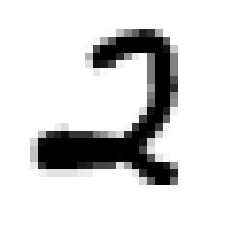

In [29]:
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [30]:
y[10999]

2

In [31]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

## Preprocessing

In [32]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [33]:
index = np.random.permutation(60000)
X_train, y_train = X_train[index], y_train[index]

In [34]:
index = np.random.permutation(10000)
X_test, y_test = X_test[index], y_test[index]

## Model selection and training

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
predictions = rf_clf.predict(X_test)

In [38]:
acc = sum(predictions == y_test)/len(predictions)

In [39]:
print(acc)

0.9701


## Adjusting the Model

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
rf_clf = RandomForestClassifier()

In [42]:
rf_clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [43]:
param_grid = { 
    'n_estimators': [200, 250, 300],
    'max_depth' : [6,8,10],
    'bootstrap': [False],
    'n_jobs': [-1]
}

In [44]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [6, 8, 10],
                         'n_estimators': [200, 250, 300], 'n_jobs': [-1]},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 10, 'n_estimators': 300, 'n_jobs': -1}

In [47]:
rf_clf_best = RandomForestClassifier(max_depth= 10, n_estimators= 300,n_jobs=-1)
rf_clf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1)

In [48]:
predictions = rf_clf_best.predict(X_test)

In [49]:
acc = sum(predictions == y_test)/len(predictions)
print(acc)

0.949


## Evaluating the Model

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [51]:
accuracy_score(predictions,y_test)

0.949

In [53]:
confusion_matrix(y_test,predictions)

array([[ 968,    1,    0,    0,    0,    2,    4,    1,    3,    1],
       [   0, 1120,    3,    3,    0,    1,    4,    1,    3,    0],
       [   6,    0,  975,    8,    9,    0,    7,   15,    8,    4],
       [   1,    0,   15,  953,    1,   13,    0,   11,   11,    5],
       [   1,    1,    2,    0,  913,    1,    8,    2,    7,   47],
       [   6,    5,    0,   16,    4,  833,   11,    3,    6,    8],
       [   7,    4,    1,    0,    6,    6,  929,    0,    5,    0],
       [   1,    8,   26,    3,    5,    0,    0,  953,    5,   27],
       [   5,    2,    7,    8,    8,    5,   10,    4,  903,   22],
       [   7,    6,    3,   13,   16,    5,    1,    5,   10,  943]],
      dtype=int64)

In [54]:
precision_score(y_test, predictions, average='weighted')

0.949245330030271

In [55]:
recall_score(y_test, predictions, average='weighted')

0.949

In [56]:
f1_score(y_test,predictions, average='weighted')

0.948992734496956

Using the MNIST dataset perform the following activities:
<ol>
     <li>Try to achieve an accuracy above 97% in the test set with KNeighborsClassifier, adjusting the 'weights' and 'n_neighbors' hyperparameters with the grid search </li>
     <li>Write a function that modifies only the training images of the dataset by shifting one pixel in each image in any direction (left, right, up or down), that is, for each image in the training set, four images offsets are created and add them to the training set. Then train your best classifier with the new augmented set. Finally, measure the performance of the model through the metrics of accuracy, precision, recall and F1-score. Tip: Investigate the shift() function of the scipy.ndimage.interpolation module to shift the pixel. </li>
</ol>

1. Try to achieve an accuracy above 97% in the test set with KNeighborsClassifier, adjusting the 'weights' and 'n_neighbors' hyperparameters with the grid search 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
neigh = KNeighborsClassifier(weights='uniform',n_neighbors=3)

In [59]:
neigh.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=3)>

In [60]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
predictions = neigh.predict(X_test)

In [65]:
accuracy_score(predictions,y_test)

0.9705

In [66]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

In [67]:
precision_score(y_test, predictions, average='weighted')

0.9706882342922246

In [68]:
recall_score(y_test, predictions, average='weighted')

0.9705

In [69]:
f1_score(y_test,predictions, average='weighted')

0.9704523390961245

In [71]:
param_grid = { 
    'n_neighbors': [3, 7 ,13],
    'weights' : ['uniform','distance'],
    'n_jobs' : [-1]
}

In [72]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [3, 7, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [75]:
grid_search.best_params_

{'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}

In [76]:
# try to change weights and n_neigh to reach 97% ACC
neigh_best =KNeighborsClassifier(weights='distance',n_neighbors=3,n_jobs=-1)
neigh_best.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [77]:
predictions = neigh_best.predict(X_test)

In [78]:
accuracy_score(predictions,y_test)

0.9717

In [109]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    1,    4,  975,    1,   13,    1,    7,    4,    4],
       [   0,    5,    0,    0,  948,    0,    5,    4,    1,   19],
       [   4,    1,    0,   12,    2,  860,    5,    1,    3,    4],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    4,    0,    2,    0,    0,  994,    0,   10],
       [   7,    0,    3,   13,    5,   11,    3,    4,  923,    5],
       [   3,    4,    2,    7,    9,    4,    1,    8,    2,  969]],
      dtype=int64)

2. Write a function that modifies only the training images of the dataset by shifting one pixel in each image in any direction (left, right, up or down), that is, for each image in the training set, four images offsets are created and add them to the training set. Then train your best classifier with the new augmented set. Finally, measure the performance of the model through the metrics of accuracy, precision, recall and F1-score. Tip: Investigate the shift() function of the scipy.ndimage.interpolation module to shift the pixel.

In [79]:
import scipy.ndimage

In [80]:
a = []
c = []
for i in range(len(X_train)):
    
    test1 = scipy.ndimage.shift(X_train[i], 2)
    
    test2 = scipy.ndimage.shift(X_train[i], -2)
    test3 = scipy.ndimage.shift(X_train[i], 4)
    test4 = scipy.ndimage.shift(X_train[i], -4)
    a.append(X_train[i])
    a.append(test1)
    a.append(test2)
    a.append(test3)
    a.append(test4)
    for j in range(5):
        c.append(y_train[i])
b = np.array(a)
c = np.array(c)
b.shape

(300000, 784)

In [113]:
test1=scipy.ndimage.shift(X_train[0],shift=2)
test1

array([ 0.00000000e+000,  0.00000000e+000, -5.03090874e-071,
        3.88674601e-070, -1.45005524e-069,  5.41154637e-069,
       -2.01961302e-068,  7.07364669e-068, -2.62749737e-067,
        1.04981010e-066, -3.62120813e-066,  1.46219684e-065,
       -5.93177128e-065,  2.03657747e-064, -7.60061061e-064,
        2.83658650e-063, -9.37085225e-063,  3.95085532e-062,
       -1.47447928e-061,  5.50283158e-061, -1.89810932e-060,
        7.66445566e-060, -2.86041379e-059,  9.67952717e-059,
       -3.98404247e-058,  1.64617408e-057, -5.54905531e-057,
        1.94348828e-056, -7.72883702e-056,  2.88444124e-055,
       -9.94921821e-055,  4.01750838e-054, -1.49935454e-053,
        5.59566732e-053, -1.87952173e-052,  8.62899814e-052,
       -2.90867052e-051,  1.01871150e-050, -3.78397894e-050,
        1.61885969e-049, -5.21502852e-049,  2.10587344e-048,
       -7.85922667e-048,  2.65941222e-047, -1.20412551e-046,
        3.64738015e-046, -1.52464946e-045,  5.69006925e-045,
       -1.98343291e-044,

In [86]:
c.shape

(300000,)

In [ ]:
b.shape

(300000, 784)

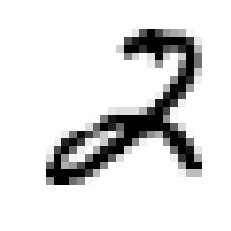

In [119]:
digito = test1.reshape(28,28)
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

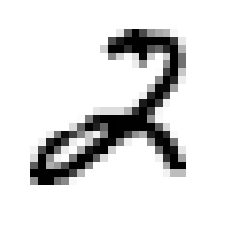

In [120]:
digito = X_train[0].reshape(28,28)
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [116]:
y_train[0]

2

In [99]:
neigh_best =KNeighborsClassifier(weights='distance',n_neighbors=3,n_jobs=-1)
neigh_best.fit(b,c)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [100]:
predictions2 = neigh_best.predict(X_test)

### Evaluation

In [101]:
accuracy_score(predictions2,y_test)

0.9703

In [102]:
confusion_matrix(y_test,predictions2)

array([[ 973,    1,    1,    0,    0,    1,    2,    2,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   8,   14,  995,    1,    1,    0,    1,    9,    3,    0],
       [   0,    3,    5,  972,    1,   15,    0,    6,    4,    4],
       [   1,    9,    1,    0,  947,    0,    2,    2,    1,   19],
       [   3,    3,    0,   13,    2,  859,    4,    1,    2,    5],
       [   3,    4,    0,    0,    3,    4,  944,    0,    0,    0],
       [   0,   18,    5,    1,    1,    0,    0,  994,    0,    9],
       [   4,    2,    3,   21,    5,    9,    4,    6,  916,    4],
       [   3,    6,    1,    8,    7,    4,    1,    7,    2,  970]],
      dtype=int64)

In [106]:
precision_score(y_test, predictions2, average='weighted')

0.9705314815635394

In [107]:
recall_score(y_test, predictions2, average='weighted')

0.9703

In [108]:
f1_score(y_test,predictions2, average='weighted')

0.9702713561516335